In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob
import os
import shutil

In [ ]:
member = ["Chika","You","Riko","Hanamaru","Ruby","Yoshiko","Dia","Kanan","Mari"]

for m in member:
  output_path = "/content/drive/MyDrive/image_member/{}/".format(m)
  file_1 = "/content/drive/MyDrive/test_image_member/{}_face_true/".format(m)
  file_2 = "/content/drive/MyDrive/test_image_member/{}_face_false/".format(m)
  finish_file = "/content/drive/MyDrive/finish_image_member/{}/".format(m)

  file_list = glob.glob(output_path+"*")
  os.makedirs(file_1,exist_ok=True)
  os.makedirs(file_2,exist_ok=True)
  os.makedirs(finish_file,exist_ok=True)



  for i,filename in enumerate(file_list,start=384):
    img = cv2.imread(filename)

    if img is None:
      print("画像が見つかりません："+filename)
      print()
      continue

    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    cascade = cv2.CascadeClassifier("/content/drive/MyDrive/cascade_character/lbpcascade_animeface.xml")

    face = cascade.detectMultiScale(img_gray)
    counter = 0

    if len(face) > 0:
      for x,y,w,h in face:
        counter += 1
        image = img[y:y+h,x:x+w]
        cv2.imwrite(file_1 + "{}_{}_{}.jpg".format(m,str(i),str(counter)),image)
        cv2.imwrite(finish_file+"{}_{}.jpg".format(m,str(i)),img)
    else:
      cv2.imwrite(file_2 + "{}_{}.jpg".format(m,str(i)),img)



  for i,filename in enumerate(file_list):
    os.remove(filename)

  print(len(glob.glob("/content/drive/MyDrive/test_image_member/{}_face_true/*".format(m))))
  print(len(glob.glob("/content/drive/MyDrive/test_image_member/{}_face_false/*".format(m))))

In [ ]:
member = ["Chika","You","Riko","Hanamaru","Ruby","Yoshiko","Dia","Kanan","Mari"]
for a in member:
  print(a,len(glob.glob("/content/drive/MyDrive/test_image_member/{}_face_true/*".format(a))),len(glob.glob("/content/drive/MyDrive/test_image_member/{}_face_false/*".format(a))))

In [ ]:
member = ["Chika","You","Riko","Hanamaru","Ruby","Yoshiko","Dia","Kanan","Mari"]

for a in member:

  test_file = "/content/drive/MyDrive/test_data_member/{}/".format(a)
  train_file = "/content/drive/MyDrive/train_data_member/{}/".format(a)
  os.makedirs(test_file,exist_ok=True)
  os.makedirs(train_file,exist_ok=True)

  file_images = glob.glob("/content/drive/MyDrive/test_image_member/{}_face_true/*".format(a))

  for i,f in enumerate(file_images,start=1):

    image = cv2.imread(f)

    if i % 10 == 0:
      cv2.imwrite(test_file+"{}_{}.jpg".format(a,str(i)),image)
    else:
      cv2.imwrite(train_file+"{}_{}.jpg".format(a,str(i)),image)

  for i,f in enumerate(file_images):
    os.remove(f)

In [ ]:
member = ["Chika","You","Riko","Hanamaru","Ruby","Yoshiko","Dia","Kanan","Mari"]

for a in member:
  print(a,"test data",len(glob.glob("/content/drive/MyDrive/test_data_member/{}/*".format(a))))
  print(a,"train data",len(glob.glob("/content/drive/MyDrive/train_data_member/{}/*".format(a))))
  print()

In [ ]:
member = ["Chika","You","Riko","Hanamaru","Ruby","Yoshiko","Dia","Kanan","Mari"]

for a in member:
  padding_file = "/content/drive/MyDrive/1_padding_train_data_member/{}/".format(a)
  file_path = "/content/drive/MyDrive/train_data_member/{}/".format(a)

  train_data_file = glob.glob(file_path+"*")
  os.makedirs(padding_file,exist_ok=True)

  for i,my_file in enumerate(train_data_file,start=1):

    image = cv2.imread(my_file)

    cv2.imwrite(padding_file+"{}_{}.jpg".format(a,str(i)),image)


In [ ]:
from keras.applications import VGG16
from keras.models import Model,Sequential
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import random
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
member = ["Chika","You","Riko","Hanamaru","Ruby","Yoshiko","Dia","Kanan","Mari"]

X_train = []
X_test = []
y_train = []
y_test = []

#学習データ・テストデータをリストに代入
for i, a in enumerate(member):
  padding_file = glob.glob("/content/drive/MyDrive/1_padding_train_data_member/{}/*".format(a))
  for f in padding_file:
    image = load_img(f)
    image = img_to_array(image)
    image = cv2.resize(image,(250,250))
    X_train.append(image)
    y_train.append(i)

for i, a in enumerate(member):
  test_files = glob.glob("/content/drive/MyDrive/test_data_member/{}/*".format(a))
  for f in test_files:
    image = load_img(f)
    image = img_to_array(image)
    image = cv2.resize(image,(250,250))
    X_test.append(image)
    y_test.append(i)

tr =list(zip(X_train,y_train))
random.shuffle(tr)
X_train,y_train = zip(*tr)

te = list(zip(X_test,y_test))
random.shuffle(te)
X_test,y_test = zip(*te)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_test_data = y_test.copy()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 250, 250, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 250, 250, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 250, 250, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 125, 125, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 125, 125, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 62, 62, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 62, 62, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 62, 62, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 31, 31, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 31, 31, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 9)                   │       6,456,841 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,171,529 (80.76 MB)

 Trainable params: 6,456,841 (24.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.3122 - loss: 9.5993 - val_accuracy: 0.9022 - val_loss: 0.4384
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.7860 - loss: 1.0079 - val_accuracy: 0.9402 - val_loss: 0.3204
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.8888 - loss: 0.4610 - val_accuracy: 0.9457 - val_loss: 0.1630
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - accuracy: 0.9440 - loss: 0.2181 - val_accuracy: 0.9457 - val_loss: 0.2639
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.9405 - loss: 0.2136 - val_accuracy: 0.9402 - val_loss: 0.2222
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.9592 - loss: 0.1421 - val_accuracy: 0.9511 - val_loss: 0.2712
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.9676 - loss: 0.1048 - val_accuracy: 0.9402 - val_loss: 0.2330
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.9702 - loss: 0.1124 - val_accu

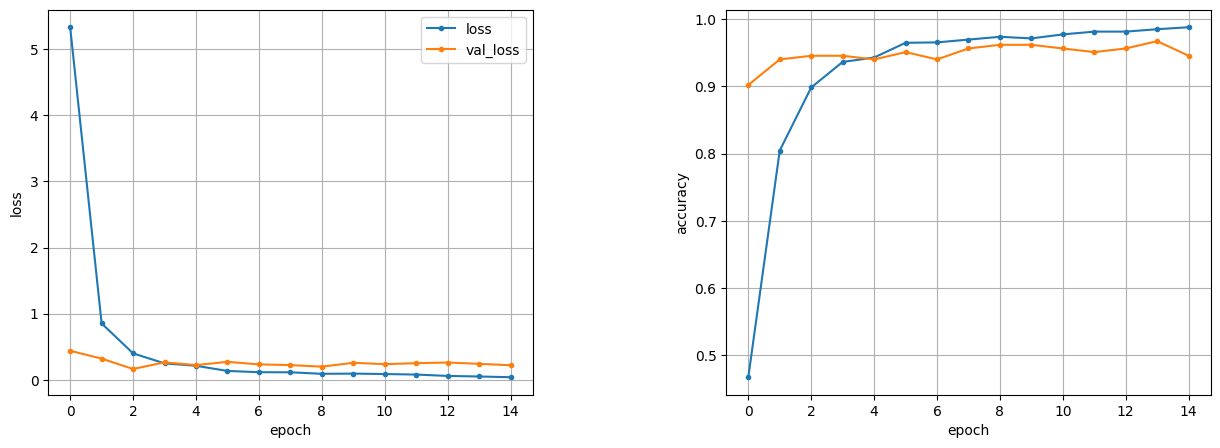

In [ ]:
#VGG16転移学習
input_tensor = Input(shape=(250,250,3))
vgg16 = VGG16(include_top=False,weights="imagenet",input_tensor=input_tensor)

top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256,activation="relu"))
top_model.add(Dropout(0.2))
top_model.add(Dense(128,activation="relu"))
top_model.add(Dropout(0.2))
top_model.add(Dense(9,activation="softmax"))

model = Model(inputs = vgg16.input, outputs = top_model(vgg16.output))

for layer in model.layers[:19]:
  layer.trainable = False

model.compile(loss="categorical_crossentropy",optimizer=optimizers.SGD(learning_rate=1e-4,momentum=0.9),metrics=["accuracy"])

model.summary()

history = model.fit(X_train,y_train,batch_size=32,epochs=15,validation_data=(X_test,y_test))

scores = model.evaluate(X_test,y_test,verbose=1)

fig = plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.4,hspace=0.6)

ax = fig.add_subplot(1,2,1)

loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=len(loss)

ax.plot(range(epochs),loss,marker=".",label="loss")
ax.plot(range(epochs),val_loss,marker=".",label="val_loss")
ax.legend(loc = "best")
ax.grid()
ax.set_xlabel("epoch")
ax.set_ylabel("loss")

accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]
epochs=len(accuracy)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(range(epochs),accuracy,marker=".",label="accuracy")
ax2.plot(range(epochs),val_accuracy,marker=".",label="val_accuracy")
ax2.grid()
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
plt.show()

In [ ]:
import os
#resultsディレクトリを作成
result_dir = 'results'
if not os.path.exists(result_dir):
    os.mkdir(result_dir)

# 重みを保存
model.save(os.path.join(result_dir, 'model_1.h5'))

# ローカルに保存
from google.colab import files
files.download( "/content/results/model_1.h5" )

In [ ]:
from tensorflow.keras.models import Model, Sequential,load_model

# モデル読み込み
model = load_model("/content/drive/MyDrive/model_1.h5")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


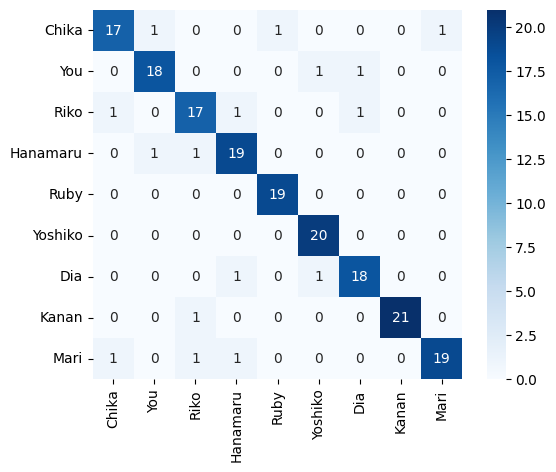

In [ ]:
member = ["Chika","You","Riko","Hanamaru","Ruby","Yoshiko","Dia","Kanan","Mari"]

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_test_data, y_pred)
cm = pd.DataFrame(data=cm,index=member,columns=member)
cm = cm.astype(int)
sns.heatmap(cm,square=True,cbar=True,annot=True,cmap='Blues')
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob
import os
import shutil
from keras.applications import VGG16
from keras.models import Model,Sequential
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import random
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential,load_model
from google.colab.patches import cv2_imshow

image_counter = 0

member = ["Chika","You","Riko","Hanamaru","Ruby","Yoshiko","Dia","Kanan","Mari"]

model = load_model("/content/drive/MyDrive/model_1.h5")

image_file = glob.glob("/content/drive/MyDrive/image_file/*")

if len(image_file) == 0:
  print("フォルダに画像がありません。")

for f in image_file:
  img = cv2.imread(f)

  if img is None:
    print("画像を開けませんでした。")
    print()
    continue

  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  cascade = cv2.CascadeClassifier("/content/drive/MyDrive/cascade_character/lbpcascade_animeface.xml")

  faces = cascade.detectMultiScale(img_gray)
  image_list = []
  counter = 0

  if len(faces) > 0:
    for x,y,w,h in faces:
      counter += 1
      image = img[y:y+h,x:x+w]
      print_image = img[y:y+h,x:x+w]
      image = img_to_array(image)
      image = cv2.resize(image,(250,250))
      data = np.array([image])

      result = model.predict(data)[0]
      predicted = result.argmax()
      per = int(result[predicted]*100)
      pred_answer = "{} 一致率{}%".format(member[predicted],per)

      cv2_imshow(print_image)
      print(pred_answer)
      print()
      print()
      image_counter += 1

  else:
    image = img_to_array(img)
    image = cv2.resize(image,(250,250))
    data = np.array([image])

    result = model.predict(data)[0]
    predicted = result.argmax()
    per = int(result[predicted]*100)
    pred_answer = "{} 一致率{}%".format(member[predicted],per)

    cv2_imshow(img)
    print(pred_answer)
    print()
    print()
    image_counter += 1

  print(image_counter)